In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


In [2]:
all_data = pd.read_csv('all_in_one_three.csv')
all_data.drop(['Unnamed: 0'],axis = 1,inplace = True)
all_data.head(n=5)

,city,people,date,year,mon,day,SO2,O3,NO2,PM10,...,rain -3,wind -1,wind -2,wind -3,humid -1,humid -2,humid -3,diff temp -1,diff temp -2,diff temp -3
0,강원,10.253465,2014-01-01,2014,1,1,0.009136,0.023676,0.014603,111.246212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원,82.027723,2014-01-02,2014,1,2,0.007581,0.018956,0.016050,50.683712,...,NaN,4.35,NaN,NaN,31.95,NaN,NaN,5.4,NaN,NaN
2,강원,71.774257,2014-01-03,2014,1,3,0.009411,0.015014,0.023754,62.465530,...,NaN,2.10,4.35,NaN,28.75,31.95,NaN,7.7,5.4,NaN
3,강원,47.849505,2014-01-04,2014,1,4,0.006177,0.013977,0.019977,58.992424,...,1.0,3.10,2.10,4.35,34.95,28.75,31.95,7.9,7.7,5.4
4,강원,13.671287,2014-01-05,2014,1,5,0.006097,0.014955,0.018314,45.530303,...,0.0,1.55,3.10,2.10,86.40,34.95,28.75,3.2,7.9,7.7


In [3]:
def holi_filter(data, month, day):
    is_month = data['mon'] != month
    is_day = data['day'] != day
    is_not_holi = data[is_day | is_month]
    
    return is_not_holi

In [4]:
def rescale_monday(df):
    if df['day name'] == 'Monday':
        return df['people'] * 0.74
    else:
        return df['people']

In [5]:
#위험도로 바꾸기
def danger_scale(df):
    if df['people'] <= 59:
        return 1
    elif df['people'] > 59 and df['people'] <= 82:
        return 2
    elif df['people'] > 82 and df['people'] <= 101:
        return 3
    elif df['people'] > 101 and df['people'] <= 131:
        return 4
    elif df['people'] > 131:
        return 5

In [6]:
#결측치 제거
all_data.dropna(axis=0, inplace = True)

# 시도 원 핫 인코딩
city = all_data.pop('city')
all_data['city1'] = (city == '서울')*1.0
all_data['city2'] = (city == '부산')*1.0
all_data['city3'] = (city == '대구')*1.0
all_data['city4'] = (city == '인천')*1.0
all_data['city5'] = (city == '광주')*1.0
all_data['city6'] = (city == '대전')*1.0
all_data['city7'] = (city == '울산')*1.0
all_data['city8'] = (city == '경기')*1.0
all_data['city9'] = (city == '강원')*1.0
all_data['city10'] = (city == '충북')*1.0
all_data['city11'] = (city == '충남')*1.0
all_data['city12'] = (city == '전북')*1.0
all_data['city13'] = (city == '전남')*1.0
all_data['city14'] = (city == '경북')*1.0
all_data['city15'] = (city == '경남')*1.0
all_data['city16'] = (city == '제주')*1.0

# 주말, 공휴일 제거
day_name_mask = (all_data['day name'] != 'Sunday')
all_data = all_data[day_name_mask]
holi_list = [[1,1],[1,2],[3,1],[3,2],[5,5],[5,6],[6,6],[6,7],[8,15],[8,16],[10,3],[10,4],[10,9],[10,10],[12,25],[12,26]]
for i in holi_list:
    all_data = holi_filter(all_data, i[0], i[1])

# 월요일 *0.74
all_data['people'] = all_data.apply(rescale_monday, axis = 1) 
    
# 지역, 날짜, 년도, 요일 제거
all_data.drop(['date','year','day name'], axis=1, inplace = True)

#인원수에서 위험도로 변환
all_data['people'] = all_data.apply(danger_scale, axis = 1)
    
all_data.head()

,people,mon,day,SO2,O3,NO2,PM10,PM25,avg temp,rain,...,city7,city8,city9,city10,city11,city12,city13,city14,city15,city16
365,1,1,5,0.009089,0.017038,0.025219,79.842424,64.552083,7.4,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366,1,1,6,0.005407,0.026443,0.014381,45.189015,30.197917,3.8,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,2,1,7,0.005050,0.023740,0.014528,33.013342,15.750000,-2.1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,2,1,8,0.005874,0.017170,0.021483,48.327062,31.711806,-0.3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,3,1,9,0.006453,0.015894,0.025202,54.018939,41.437500,1.6,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_dataset = all_data.sample(frac=0.9,random_state=0)
test_dataset = all_data.drop(train_dataset.index)

train_labels = train_dataset.pop('people')
test_labels = test_dataset.pop('people')

def norm(x):
    print('mean : ',x.mean())
    print('std : ',x.std())
    return (x - x.mean()) / x.std()

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.head()

mean :  mon              6.575982
day             16.104773
SO2              0.004082
O3               0.028704
NO2              0.019958
PM10            43.616678
PM25            24.897566
avg temp        13.882459
rain             3.817842
wind             2.032761
humid           67.699973
diff temp        9.548801
SO2 -1           0.004065
SO2 -2           0.004069
SO2 -3           0.004065
O3 -1            0.028892
O3 -2            0.028919
O3 -3            0.029038
NO2 -1           0.019474
NO2 -2           0.019273
NO2 -3           0.019253
PM10 -1         43.449786
PM10 -2         43.737918
PM10 -3         43.796180
PM25 -1         24.813919
PM25 -2         24.852421
PM25 -3         24.860596
avg temp -1     13.903277
avg temp -2     13.907937
avg temp -3     13.891968
rain -1          3.758432
rain -2          3.696907
rain -3          3.818695
wind -1          2.029850
wind -2          2.015938
wind -3          2.015912
humid -1        67.903288
humid -2        67.856114
humi

,mon,day,SO2,O3,NO2,PM10,PM25,avg temp,rain,wind,...,city7,city8,city9,city10,city11,city12,city13,city14,city15,city16
2451,0.997379,-1.738153,-0.504922,-0.799571,-0.084103,-1.114467,-1.282080,0.185973,1.858726,0.454142,...,-0.263657,3.833932,-0.259252,-0.260164,-0.245683,-0.25067,-0.262626,-0.245547,-0.259513,-0.260684
19018,-0.750356,-0.817568,1.751018,0.346195,0.622233,1.313105,1.293725,-0.427953,-0.201059,0.356945,...,-0.263657,-0.260813,-0.259252,-0.260164,-0.245683,-0.25067,-0.262626,-0.245547,-0.259513,-0.260684
10737,-0.167777,1.253748,-1.312433,0.481215,-0.773933,-0.923257,-0.786587,1.219414,5.461895,-0.420631,...,-0.263657,-0.260813,-0.259252,-0.260164,-0.245683,-0.25067,-0.262626,-0.245547,-0.259513,-0.260684
7836,0.123512,-0.817568,-0.663359,-0.987488,-0.417433,-1.155423,-1.099017,1.168254,2.850782,-0.906616,...,-0.263657,-0.260813,-0.259252,-0.260164,-0.245683,-0.25067,-0.262626,-0.245547,-0.259513,-0.260684
17617,-0.167777,-0.932641,1.089766,1.907684,0.199926,-0.382464,-0.176444,0.758970,-0.317478,0.454142,...,3.792574,-0.260813,-0.259252,-0.260164,-0.245683,-0.25067,-0.262626,-0.245547,-0.259513,-0.260684


In [8]:
len(train_dataset)

16846

In [9]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer = 'adam',metrics=['mae', 'mse'])
    
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3776      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [10]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.39617485],
       [1.0202293 ],
       [0.7560796 ],
       [0.7595312 ],
       [0.731977  ],
       [0.8627914 ],
       [0.5957381 ],
       [0.67007977],
       [0.34870604],
       [0.70005953]], dtype=float32)

In [11]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


..........................................................................Epoch 00074: early stopping


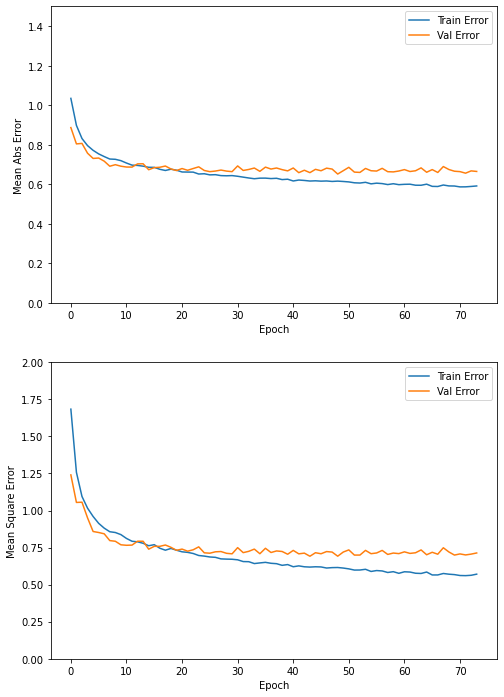

In [12]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure(figsize=(8,12))
  
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,1.5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
    plt.ylim([0,2])
    plt.legend()
    plt.show()
    
plot_history(history)

In [13]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f}".format(mae))

59/59 - 0s - loss: 0.6880 - mae: 0.6559 - mse: 0.6880
테스트 세트의 평균 절대 오차:  0.66


In [14]:
model.save('./tensorsave/nose_model')

INFO:tensorflow:Assets written to: ./tensorsave/nose_model\assets


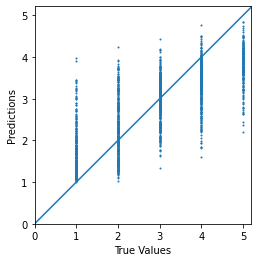

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,s=1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000, 1000], [-1000, 1000])

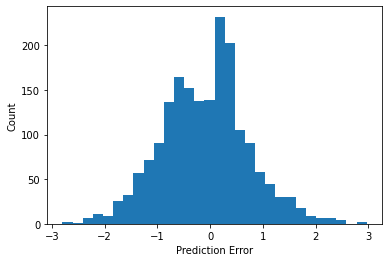

In [16]:
error = test_predictions - test_labels
plt.hist(error, bins = 30)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [17]:
print(len(test_labels))

1872


In [18]:
print(len(test_predictions))

1872


In [19]:
test_labels_np = test_labels.tolist()
test_predictions_pd = pd.DataFrame(test_predictions, columns = ['predicition'])
test_labels_pd = pd.DataFrame(test_labels_np, columns = ['label'])
r_squ = pd.concat([test_labels_pd, test_predictions_pd], axis = 1)
r_squ.head()

,label,predicition
0,1,2.232565
1,3,2.107420
2,2,2.307438
3,2,3.305628
4,3,2.343864


In [20]:
r_squ.corr()

,label,predicition
label,1.000000,0.787311
predicition,0.787311,1.000000


In [21]:
from sklearn.metrics import r2_score

In [22]:
test_predictions_np = test_predictions

print('r square :', r2_score(test_labels_np, test_predictions_np))

r square : 0.6083871492351659
